<a href="https://www.kaggle.com/code/rishitabansal/wids-datathon-r?scriptVersionId=117804505" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wids-datathon-optimizing-agricultural-production/sample_submission.csv
/kaggle/input/wids-datathon-optimizing-agricultural-production/data.csv


**Import all the required modules in the beginning**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Read the dataframe and display first 5 entries.**

In [3]:
df=pd.read_csv("/kaggle/input/wids-datathon-optimizing-agricultural-production/data.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**Check the statistical parameters of the dataset.**

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


*We can clearly observe the presence of outliers in the dataset.*

**Check for datatypes and missing values of variables.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**Visualise the dataset to analyse data distribution,skewness and outliers using various plots.**

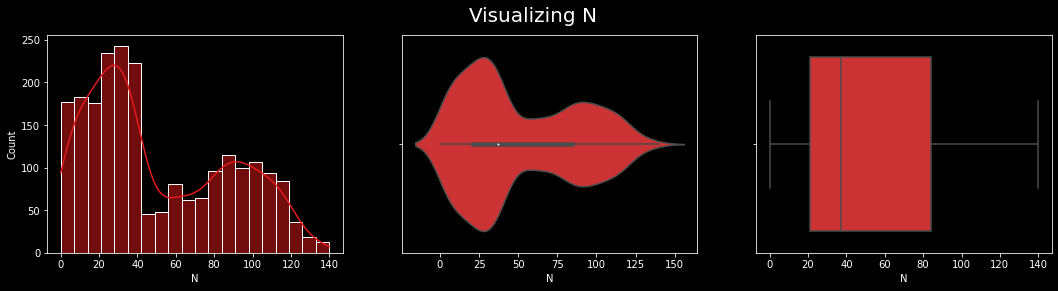

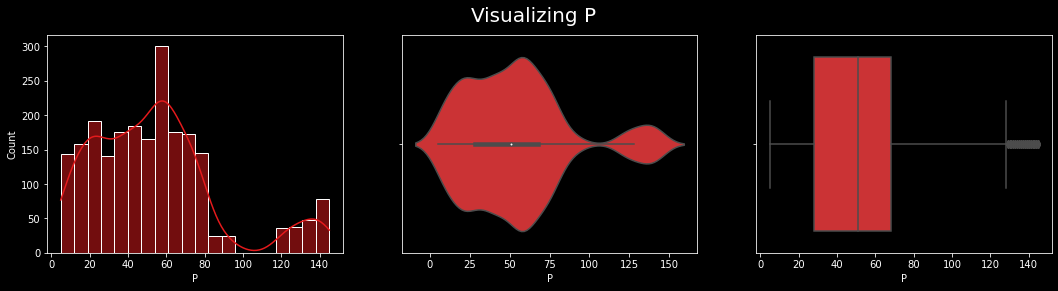

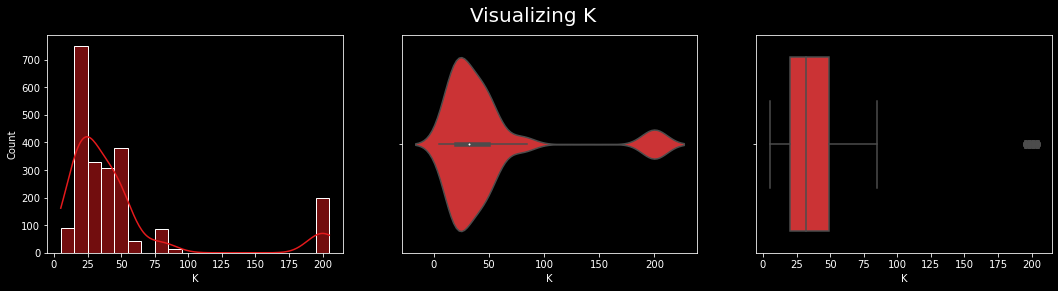

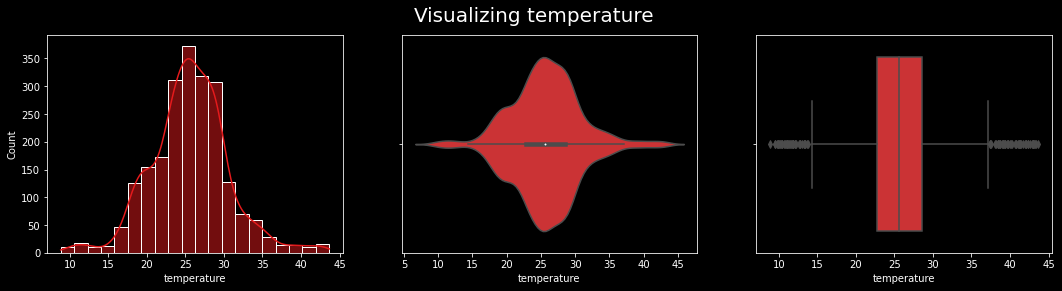

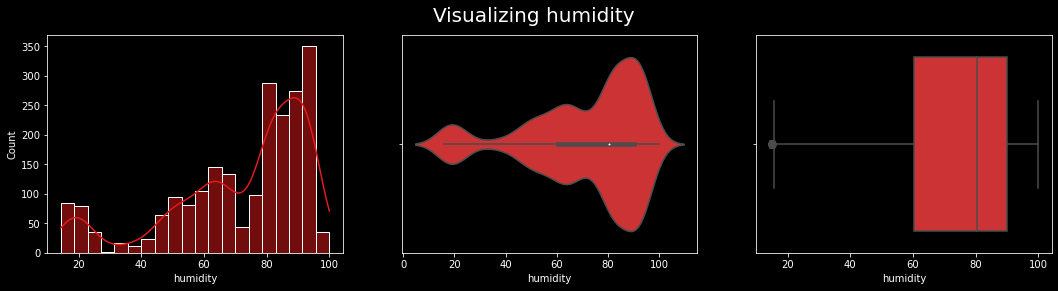

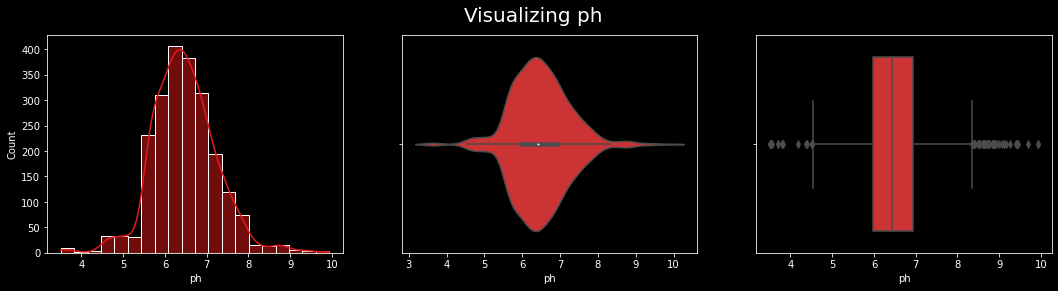

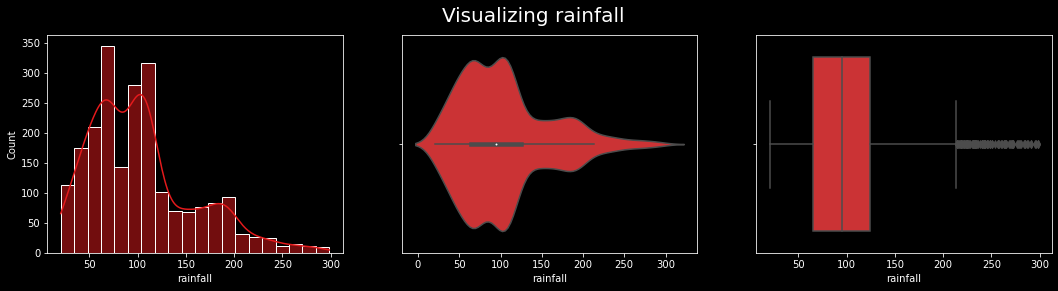

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
sns.set_palette("Set1")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

*We can infer that the data is not normally distributed except for Ph and Temprature.*

**Transform the categorical variable of crops to numeric variable for easy data processing.**

In [7]:
names = df['label'].unique()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['ID']=encoder.fit_transform(df['label'])
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,ID
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


**Prepare the dataset for training and testing purpose.**

In [8]:
X=df.drop(['label','ID'],axis=1)
y=df['ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

**Use classification techniques for making prediction models and checking accuracy using different evaluation metrics.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      0.93      0.97        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.94      1.00      0.97        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

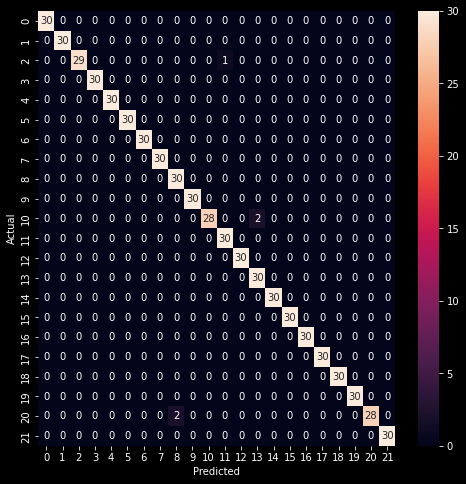

In [9]:
clf=RandomForestClassifier()
clf.fit(X_train.values,y_train.values)
y_pred_test = clf.predict(X_test.values)
confusion_clf=confusion_matrix(y_test.values,y_pred_test)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_clf,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test.values,y_pred_test))

*We infer that our model has an accuracy of **99%**.*

**Predict using the given sample.**

In [10]:
arr=np.array([90,40,40,20,80,7,200])
arr=arr.reshape(1,-1)
x=clf.predict(arr)
y=encoder.inverse_transform(x)
data={'id':1,'Crops':y}
s=pd.DataFrame(data)
s=s.set_index("id")
s

,Crops
id,
1,rice


**Save the given predictions into a csv file format and print the results.**

In [11]:
s.to_csv("submission.csv")